In [176]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [177]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [178]:
PLAID_CLIENT_ID = 'XX'
PLAID_SECRET = 'XX'
PLAID_PUBLIC_KEY = 'XX'
PLAID_ENV = 'sandbox'
PLAID_PRODUCTS = 'transactions'

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [179]:
INSTITUTION_ID = "ins_109508"



In [180]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [181]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])


### 3. Exchange the public token for an access token

In [182]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [183]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'BjqdzejglEcqek3eQz3ZHMxzok8l8xtw5bZrP',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '3RWwelRDB4irMlvMZdvEFEBWD91g1BFqbDPzA',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'xjdw3bjZB1cvK91KQV1qUDxlG84q4xcnP3N8z',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [184]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)

### 2. Print the categories for each transaction

In [185]:
# YOUR CODE HERE
for transactions in transaction_response['transactions']:
        print(json.dumps(transactions['category'], indent=4, sort_keys=True))

[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Car Service",
    "Ride Share"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Car Service",
    "Ride Share"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [186]:
# YOUR CODE HERE
plaid_date = []
plaid_name = []
plaid_amount = []
plaid_category = []

for transactions in transaction_response['transactions']:
        plaid_date.append(json.dumps(transactions['date']))
        plaid_name.append(json.dumps(transactions['name']))
        plaid_amount.append(json.dumps(transactions['amount']))
        plaid_category.append(json.dumps(transactions['category'][0]))


In [187]:
plaid_df = pd.DataFrame()
plaid_df['Date'] = plaid_date
plaid_df['Name'] = plaid_name
plaid_df['Amount'] = plaid_amount
plaid_df['Category'] = plaid_category


plaid_df.head()


,Date,Name,Amount,Category
0,"""2019-09-03""","""United Airlines""",500,"""Travel"""
1,"""2019-09-01""","""Uber 072515 SF**POOL**""",6.33,"""Travel"""
2,"""2019-08-29""","""Tectra Inc""",500,"""Food and Drink"""
3,"""2019-08-28""","""AUTOMATIC PAYMENT - THANK""",2078.5,"""Payment"""
4,"""2019-08-28""","""KFC""",500,"""Food and Drink"""


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [223]:
# YOUR CODE HERE
plaid_df['Amount'] = plaid_df['Amount'].astype(float)

plaid_df.dtypes

Date         object
Name         object
Amount      float64
Category     object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [192]:
# YOUR CODE HERE
Income_response = client.Income.get(access_token)
Income_response



{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'HSPZBeUSa4zklJQ'}

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

                  Amount
Category                
"Food and Drink"       5
"Payment"              2
"Recreation"           1
"Shops"                1
"Transfer"             3
"Travel"               4
                   Amount
Category                 
"Food and Drink"  1105.73
"Payment"         2103.50
"Recreation"        78.50
"Shops"            500.00
"Transfer"        6845.78
"Travel"            11.73


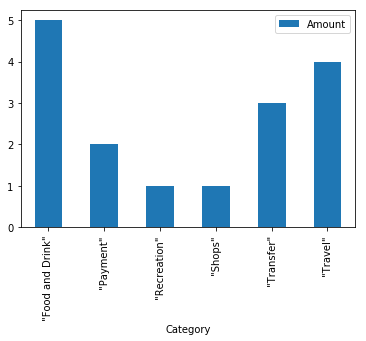

In [238]:
# YOUR CODE HERE
plaid_df2 = plaid_df.drop(columns = ['Name', 'Date'])
total = plaid_df2.groupby(['Category']).sum()
count = plaid_df2.groupby(['Category']).count()
count.plot(kind='bar')
print(count)
print(total)


### Calculate the expenses per month

In [ ]:
# YOUR CODE HERE